<a href="https://colab.research.google.com/github/thyeaditungson29/myDataScience/blob/main/PML_Project_predictPremyInsurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Inisialisasi Library**

In [8]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter
import datetime as dt #for timestamp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# Plotly Libraris
from plotly.offline import init_notebook_mode, iplot, plot 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

# **Unduh Data**

*Data diambil dari kaggle: https://www.kaggle.com/datasets/tejashvi14/medical-insurance-premium-prediction*

In [1]:
#install kaggle di colabs
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thyeaditungson29","key":"dba4278816cf1a21a33350216eb24964"}'}

In [3]:
# Salin file kaggle.json ke folder supaya API dapat menemukannya.
!mkdir -p ~/.kaggle/ && cp kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Unduh dataset
!kaggle datasets download -d tejashvi14/medical-insurance-premium-prediction

  0% 0.00/7.08k [00:00<?, ?B/s]
100% 7.08k/7.08k [00:00<00:00, 4.85MB/s]


In [5]:
#Unzip dataset yang sudah diunduh
!unzip -q medical-insurance-premium-prediction.zip

In [9]:
#Mount data dengan pandas
df_path = '/content/Medicalpremium.csv'
df_insurance = pd.read_csv(df_path)

# **Observasi Data**

In [10]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [11]:
df_insurance.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Age,45,60,36,52,38,30,33,23,48,38
Diabetes,0,1,1,1,0,0,0,0,1,0
BloodPressureProblems,0,0,1,1,0,0,0,0,0,0
AnyTransplants,0,0,0,0,0,0,0,0,0,0
AnyChronicDiseases,0,0,0,1,1,0,0,0,0,0
Height,155,180,158,183,166,160,150,181,169,182
Weight,57,73,59,93,88,69,54,79,74,93
KnownAllergies,0,0,0,0,0,1,0,1,1,0
HistoryOfCancerInFamily,0,0,0,0,0,0,0,0,0,0
NumberOfMajorSurgeries,0,0,1,2,1,1,0,0,0,0


In [12]:
df_insurance.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [ ]:
Unique_Age = df_insurance['Age'].unique()
print('Age_range', sorted(Unique_Age))
print('\n')

Unique_Height = df_insurance['Height'].unique()
print('Height_range', sorted(Unique_Height))
print('\n')

Unique_Weight = df_insurance['Weight'].unique()
print('Weight_range', sorted(Unique_Weight))
print('\n')

Unique_PremiumPrice = df_insurance['PremiumPrice'].unique()
print('PremiumPrice_range', sorted(Unique_PremiumPrice))

Age_range [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]


Height_range [145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188]


Weight_range [51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 114, 116, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 132]


PremiumPrice_range [15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 34000, 35000, 36000, 38000, 39000, 40000]


In [ ]:
df_insurance.columns = df_insurance.columns.str.strip()

In [ ]:
df_insurance.tail()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000
985,21,0,0,0,0,158,75,1,0,1,15000


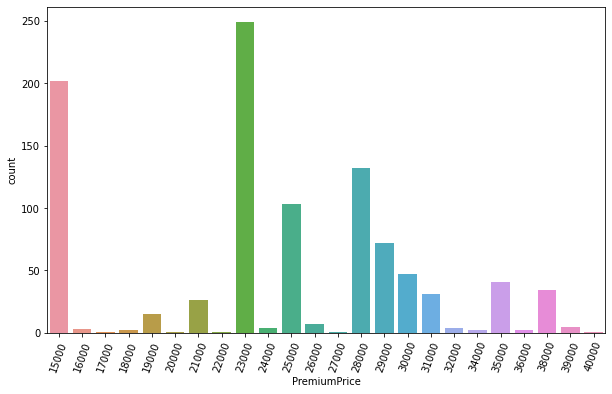

In [13]:
# Premium Price
plt.figure(figsize=(10, 6))
plt.xticks(rotation=70)
sns.countplot(x='PremiumPrice', data=df_insurance)

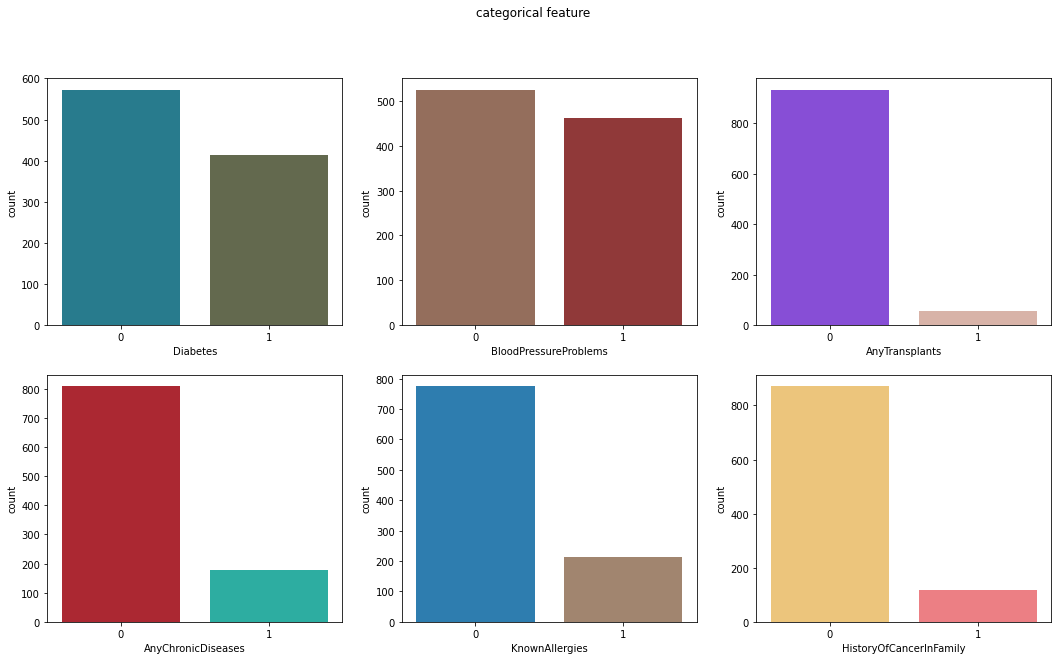

In [14]:
# plot countplot of categorical feature.
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('categorical feature')

sns.countplot(x='Diabetes', data=df_insurance, ax=axes[0,0], palette=['#17869E',"#656d4a"])
sns.countplot(x='BloodPressureProblems', data=df_insurance, ax=axes[0,1], palette=['#9d6b53',"#9e2a2b"])
sns.countplot(x='AnyTransplants', data=df_insurance, ax=axes[0,2], palette=['#8338ec',"#e0afa0"])
sns.countplot(x='AnyChronicDiseases', data=df_insurance, ax=axes[1,0], palette=['#c1121f',"#17c3b2"])
sns.countplot(x='KnownAllergies', data=df_insurance, ax=axes[1,1], palette=['#1982c4',"#a98467"])
sns.countplot(x='HistoryOfCancerInFamily', data=df_insurance, ax=axes[1,2], palette=['#ffcb69',"#fe6d73"])

['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries', 'PremiumPrice']

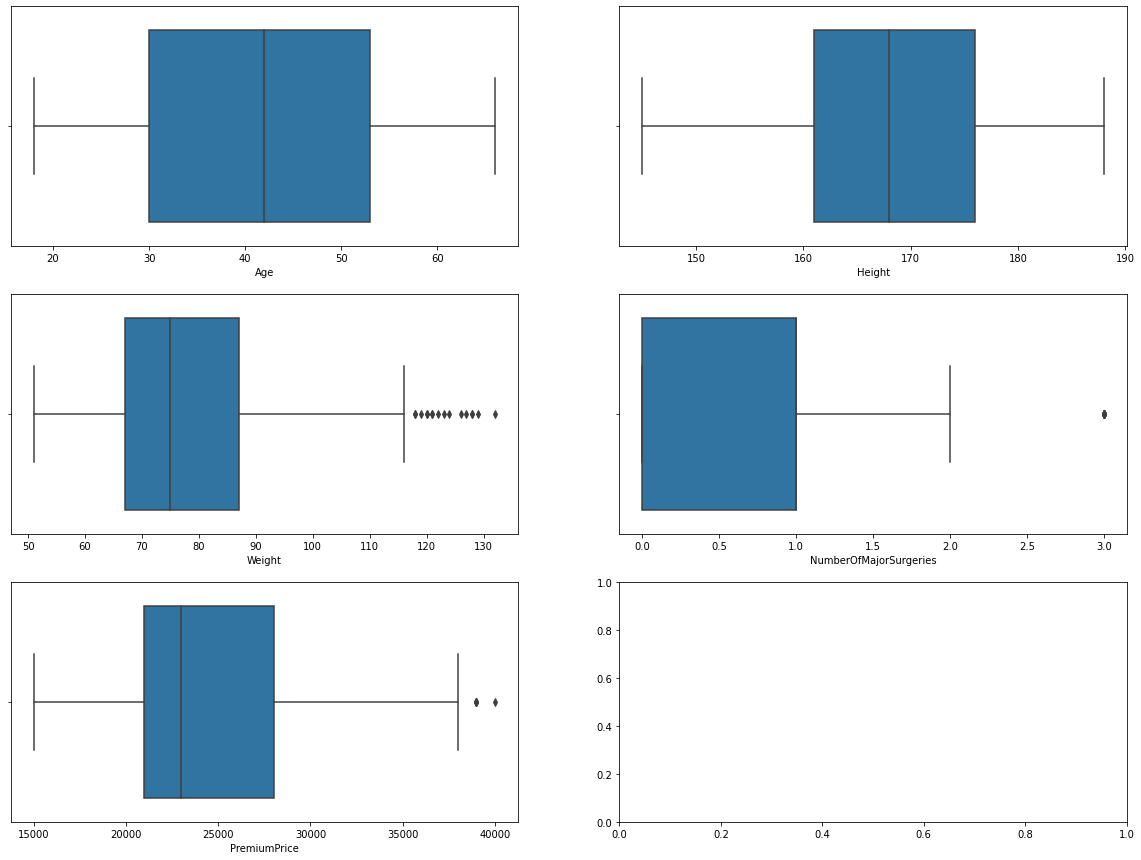

In [16]:
binary_feature = [i for i in df_insurance.columns if (len(df_insurance[i].unique()) == 2)]
target_feature = 'PremiumPrice'
disceate_feature = [i for i in df_insurance.columns if (i not in binary_feature) and (i not in target_feature)]
fig, ax = plt.subplots(3,2, figsize = (20,15))
sns.boxplot(ax =ax[0,0], data = df_insurance , x = 'Age')
sns.boxplot(ax =ax[0,1], data = df_insurance , x = "Height")
sns.boxplot(ax =ax[1,0], data = df_insurance , x = "Weight")
sns.boxplot(ax =ax[1,1], data = df_insurance , x = "NumberOfMajorSurgeries")
sns.boxplot(ax =ax[2,0], data = df_insurance , x = "PremiumPrice")
cols = [i for i  in df_insurance.columns if i not in binary_feature]
cols

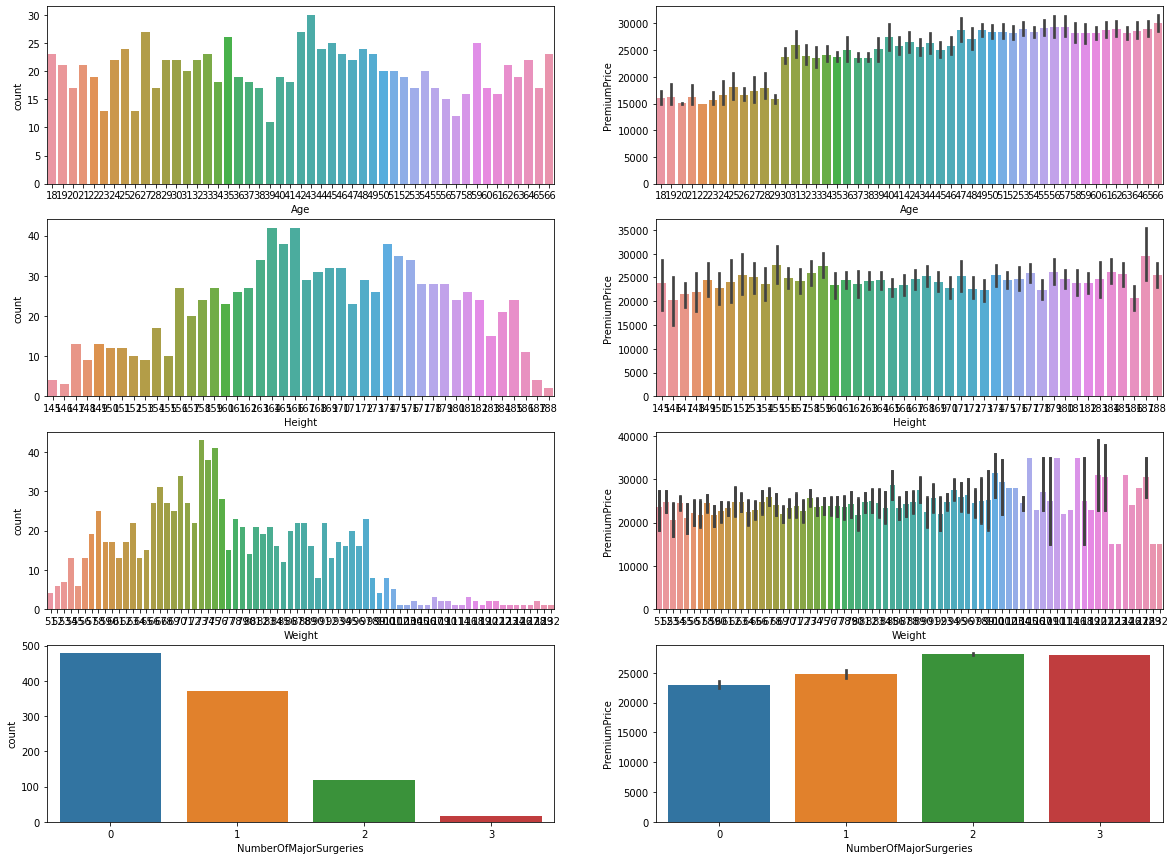

In [17]:
fig, ax = plt.subplots(4,2, figsize = (20,15))
sns.countplot(ax =ax[0,0], data = df_insurance , x = disceate_feature[0])
sns.barplot(ax =ax[0,1], data = df_insurance , x = disceate_feature[0], y = target_feature)
sns.countplot(ax =ax[1,0], data = df_insurance , x = disceate_feature[1])
sns.barplot(ax =ax[1,1], data = df_insurance , x = disceate_feature[1], y = target_feature)
sns.countplot(ax =ax[2,0], data = df_insurance , x = disceate_feature[2])
sns.barplot(ax =ax[2,1], data = df_insurance , x = disceate_feature[2], y = target_feature)
sns.countplot(ax =ax[2,0], data = df_insurance , x = disceate_feature[2])
sns.barplot(ax =ax[2,1], data = df_insurance , x = disceate_feature[2], y = target_feature)
sns.countplot(ax =ax[3,0], data = df_insurance , x = disceate_feature[3])
sns.barplot(ax =ax[3,1], data = df_insurance , x = disceate_feature[3], y = target_feature)

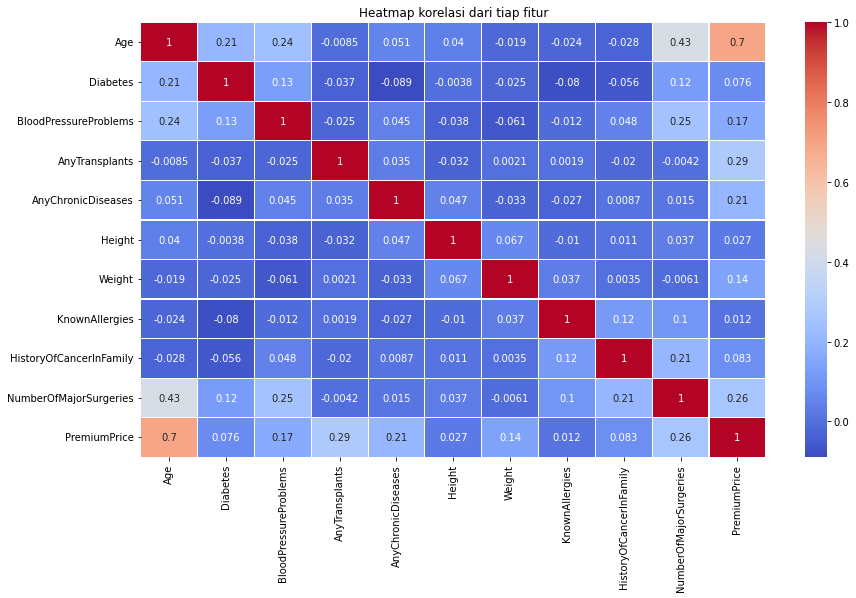

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df_insurance.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.title("Heatmap korelasi dari tiap fitur")
plt.show()

In [34]:
!pip install -q pycaret[full]

     |████████████████████████████████| 320 kB 30.9 MB/s 
     |████████████████████████████████| 17.8 MB 676 kB/s 
     |████████████████████████████████| 167 kB 52.8 MB/s 
     |████████████████████████████████| 56 kB 5.0 MB/s 
     |████████████████████████████████| 262 kB 59.0 MB/s 
     |████████████████████████████████| 6.8 MB 36.5 MB/s 
     |████████████████████████████████| 1.7 MB 38.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 47.8 MB/s 
     |████████████████████████████████| 2.0 MB 40.0 MB/s 
     |████████████████████████████████| 88 kB 7.9 MB/s 
     |████████████████████████████████| 120 kB 59.4 MB/s 
     |████████████████████████████████| 132 kB 51.7 MB/s 
     |████████████████████████████████| 40 kB 5.9 MB/s 
     |████████████████████████████████| 100 kB 11.5 MB/s 
     |███████████████████

In [35]:
from pycaret.utils import version
version()

'2.3.10'

In [ ]:
!pip install markupsafe==2.0.1

  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import jinja2

In [ ]:
from pycaret.regression import *
# from pycaret.classification import *

In [ ]:
random_seed = 69
def data_sampling(dataset, frac: float, random_seed: int):
    data_sampled_a = dataset.sample(frac=frac, random_state=random_seed)
    data_sampled_b =  dataset.drop(data_sampled_a.index).reset_index(drop=True)
    data_sampled_a.reset_index(drop=True, inplace=True)
    return data_sampled_a, data_sampled_b

In [ ]:
df_seen, df_unseen = data_sampling(df_insurance, 1, random_seed)

In [ ]:
exp1 = setup(df_seen,
             target = 'PremiumPrice',feature_selection = True,silent= True)

,Description,Value
0,session_id,4529
1,Target,PremiumPrice
2,Original Data,"(986, 11)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(690, 12)"


In [ ]:
best = compare_models() 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1210.9420,8.987533e+06,2938.6914,0.7715,0.1209,0.0508,0.464
gbr,Gradient Boosting Regressor,1694.9530,9.187016e+06,2985.5663,0.7661,0.1194,0.0689,0.076
lightgbm,Light Gradient Boosting Machine,1658.9495,9.462860e+06,2994.4367,0.7608,0.1239,0.0694,0.114
catboost,CatBoost Regressor,1733.3332,1.015980e+07,3124.2883,0.7416,0.1277,0.0724,0.752
xgboost,Extreme Gradient Boosting,1589.4299,1.121111e+07,3279.3202,0.7149,0.1360,0.0670,0.414
et,Extra Trees Regressor,1505.5507,1.142427e+07,3312.3533,0.7087,0.1373,0.0649,0.419
dt,Decision Tree Regressor,1001.4493,1.396957e+07,3595.2621,0.6412,0.1439,0.0436,0.017
llar,Lasso Least Angle Regression,2760.8030,1.540716e+07,3894.4335,0.6021,0.1616,0.1187,0.015
ridge,Ridge Regression,2763.8946,1.542760e+07,3896.4233,0.6015,0.1616,0.1186,0.014
br,Bayesian Ridge,2769.0021,1.544688e+07,3898.0816,0.6013,0.1615,0.1187,0.015


In [ ]:
tuned_best = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1316.2269,4.813790e+06,2194.0351,0.8471,0.1028,0.0611
1,1608.1670,1.085496e+07,3294.6870,0.7422,0.1243,0.0559
2,1559.8402,9.962934e+06,3156.4115,0.7575,0.1244,0.0661
3,934.2539,3.263875e+06,1806.6197,0.8941,0.0671,0.0365
4,1473.3642,6.184349e+06,2486.8351,0.8445,0.1041,0.0643
5,1435.7291,9.741704e+06,3121.1703,0.7347,0.1274,0.0574
6,1629.0757,1.563630e+07,3954.2762,0.5756,0.1506,0.0576
7,1341.4443,5.200163e+06,2280.3867,0.8588,0.0985,0.0561
8,1864.6416,1.653832e+07,4066.7339,0.6435,0.1521,0.0659


In [ ]:
tuned_best2 = tune_model(best,n_iter=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,943.7681,5.171824e+06,2274.1645,0.8357,0.1037,0.0394
1,1101.6908,1.014174e+07,3184.6102,0.7591,0.1219,0.0337
2,1116.1353,1.134878e+07,3368.7948,0.7237,0.1318,0.0379
3,738.5024,3.420131e+06,1849.3596,0.8891,0.0679,0.0264
4,845.2174,4.221286e+06,2054.5769,0.8939,0.0803,0.0321
5,949.6618,9.113453e+06,3018.8497,0.7518,0.1207,0.0325
6,1176.7633,1.465581e+07,3828.2914,0.6022,0.1439,0.0363
7,873.4783,4.426724e+06,2103.9781,0.8798,0.0867,0.0321
8,1215.1691,1.588858e+07,3986.0484,0.6575,0.1525,0.0374


In [ ]:
print(best)
print(tuned_best)
print(tuned_best2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=4529, verbose=0, warm_start=False)
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.002,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=240, n_jobs=-1, oob_score=False,
                      random_state=4529, verbose=0, warm_start=False)
RandomForestRe

In [ ]:
# tune model optuna
tune_model(best, search_library = 'optuna', n_iter=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,988.7142,5.619084e+06,2370.4608,0.8215,0.1093,0.0409
1,1180.4194,9.572732e+06,3093.9831,0.7726,0.1193,0.0378
2,1200.7401,1.131895e+07,3364.3644,0.7245,0.1316,0.0422
3,729.3864,3.191088e+06,1786.3616,0.8965,0.0654,0.0261
4,880.5735,3.561248e+06,1887.1270,0.9105,0.0738,0.0333
5,1056.2751,9.435230e+06,3071.6820,0.7430,0.1230,0.0371
6,1278.3842,1.594226e+07,3992.7764,0.5673,0.1523,0.0401
7,894.3262,4.455208e+06,2110.7364,0.8791,0.0884,0.0344
8,1209.7749,1.610820e+07,4013.5024,0.6528,0.1550,0.0374


RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                      max_depth=9, max_features=0.6393272545454146,
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.01826193612832816,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=235, n_jobs=-1, oob_score=False,
                      random_state=4529, verbose=0, warm_start=False)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.losses import MeanSquaredError

In [ ]:
df_insurance2 = pd.read_csv(df_path)

In [ ]:
df_permutated = df_insurance2.sample(frac=1)

train_size = 0.8
train_end = int(len(df_permutated)*train_size)

df_train = df_permutated[:train_end]
df_test = df_permutated[train_end:]

In [ ]:
df_train.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
519,20,0,0,0,0,166,88,0,0,0,15000
423,20,0,0,0,0,175,68,0,0,1,15000
956,46,1,1,0,0,146,67,0,0,0,25000
503,64,1,1,0,0,180,92,0,0,2,28000
640,36,1,1,0,0,166,92,0,0,1,23000


In [ ]:
df_test.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
806,27,0,0,0,1,177,71,1,0,1,19000
798,57,1,1,0,0,162,86,1,0,2,28000
51,63,0,1,0,0,161,77,0,0,2,28000
768,30,1,1,0,1,164,65,0,0,0,21000
189,35,1,0,0,0,164,100,0,0,0,23000


In [ ]:
x_train, y_train = df_train.drop('PremiumPrice', axis=1), df_train['PremiumPrice']
x_test, y_test = df_test.drop('PremiumPrice', axis=1), df_test['PremiumPrice']

In [ ]:
def scale_datasets(x_train, x_test):
  """
  Standard Scale test and train data
  Z - Score normalization
  """
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [ ]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [ ]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=30, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/30
10/10 [==============================] - 2s 54ms/step - loss: 42.4048 - mean_squared_logarithmic_error: 41.9382 - val_loss: 10.2030 - val_mean_squared_logarithmic_error: 10.2945
Epoch 2/30
10/10 [==============================] - 0s 14ms/step - loss: 5.1110 - mean_squared_logarithmic_error: 5.0641 - val_loss: 1.9240 - val_mean_squared_logarithmic_error: 1.9646
Epoch 3/30
10/10 [==============================] - 0s 17ms/step - loss: 0.9958 - mean_squared_logarithmic_error: 0.9882 - val_loss: 0.4526 - val_mean_squared_logarithmic_error: 0.4666
Epoch 4/30
10/10 [==============================] - 0s 17ms/step - loss: 0.2350 - mean_squared_logarithmic_error: 0.2334 - val_loss: 0.1564 - val_mean_squared_logarithmic_error: 0.1587
Epoch 5/30
10/10 [==============================] - 0s 16ms/step - loss: 0.0955 - mean_squared_logarithmic_error: 0.0950 - val_loss: 0.0989 - val_mean_squared_logarithmic_error: 0.0964
Epoch 6/30
10/10 [==============================] - 0s 16ms/step - loss

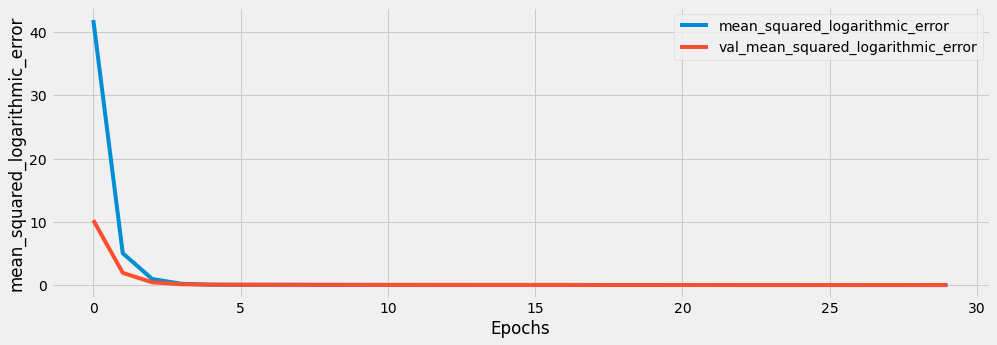

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [ ]:
# loss function
mse = MeanSquaredError()
model.compile(
    loss=mse, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[mse]
)
# train the model
history2 = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=30, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/30
10/10 [==============================] - 1s 26ms/step - loss: 618330496.0000 - mean_squared_error: 618708480.0000 - val_loss: 596572992.0000 - val_mean_squared_error: 603619136.0000
Epoch 2/30
10/10 [==============================] - 0s 10ms/step - loss: 391763520.0000 - mean_squared_error: 388299712.0000 - val_loss: 88354560.0000 - val_mean_squared_error: 88928216.0000
Epoch 3/30
10/10 [==============================] - 0s 11ms/step - loss: 83880160.0000 - mean_squared_error: 83193280.0000 - val_loss: 26857952.0000 - val_mean_squared_error: 28223470.0000
Epoch 4/30
10/10 [==============================] - 0s 9ms/step - loss: 54290932.0000 - mean_squared_error: 54036704.0000 - val_loss: 30032618.0000 - val_mean_squared_error: 31647642.0000
Epoch 5/30
10/10 [==============================] - 0s 11ms/step - loss: 29398608.0000 - mean_squared_error: 29404352.0000 - val_loss: 18532764.0000 - val_mean_squared_error: 19138000.0000
Epoch 6/30
10/10 [==============================] 

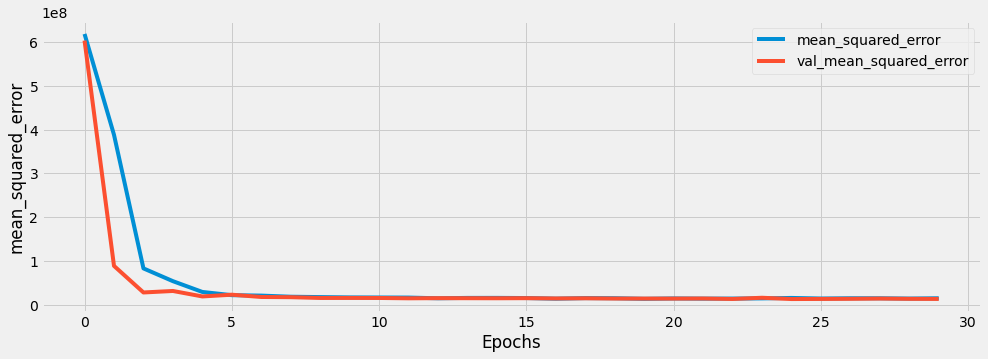

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history2, 'mean_squared_error')

In [ ]:
# loss function
mae = MeanAbsoluteError()
model.compile(
    loss=mae, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[mae]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=30, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/30
10/10 [==============================] - 2s 53ms/step - loss: 24091.3867 - mean_absolute_error: 24087.1465 - val_loss: 23595.1582 - val_mean_absolute_error: 23750.2988
Epoch 2/30
10/10 [==============================] - 0s 16ms/step - loss: 18746.1367 - mean_absolute_error: 18617.6445 - val_loss: 8732.5742 - val_mean_absolute_error: 8880.9961
Epoch 3/30
10/10 [==============================] - 0s 15ms/step - loss: 7293.9873 - mean_absolute_error: 7251.1157 - val_loss: 5207.6172 - val_mean_absolute_error: 5264.6782
Epoch 4/30
10/10 [==============================] - 0s 14ms/step - loss: 5445.7788 - mean_absolute_error: 5427.6260 - val_loss: 3858.9788 - val_mean_absolute_error: 3776.0022
Epoch 5/30
10/10 [==============================] - 0s 14ms/step - loss: 4130.6821 - mean_absolute_error: 4119.1470 - val_loss: 3672.3640 - val_mean_absolute_error: 3763.4910
Epoch 6/30
10/10 [==============================] - 0s 15ms/step - loss: 3453.7114 - mean_absolute_error: 3461.6082 - v

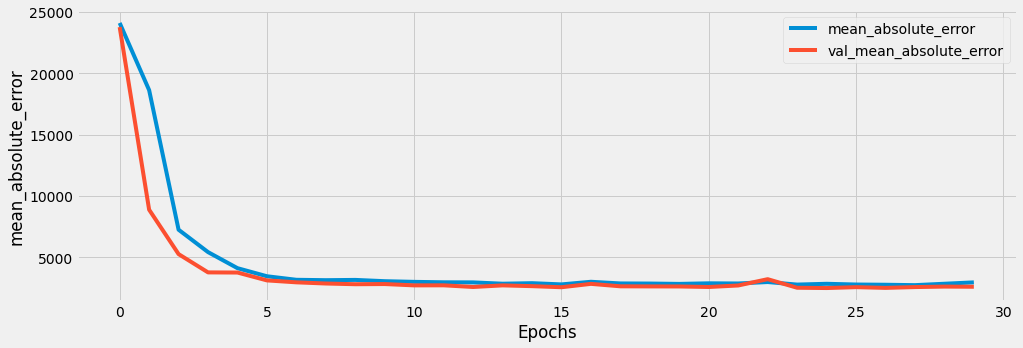

In [ ]:
plot_history(history, 'mean_absolute_error')

In [ ]:
x_test['prediction'] = model.predict(x_test_scaled)

In [ ]:
x_test['prediction']

806    20256.951172
798    31882.187500
51     32647.220703
768    19399.759766
189    21404.048828
           ...     
212    30434.791016
356    22852.732422
247    25752.744141
936    13721.467773
944    18673.330078
Name: prediction, Length: 198, dtype: float32

In [18]:
df_ins = pd.read_csv(df_path)

In [19]:
pr_lab=['Low','Basic','Average','High','SuperHigh']
df_ins['PremiumLabel']=pr_bins=pd.cut(df_ins['PremiumPrice'],bins=5,labels=pr_lab,precision=0)
df_ins['AgeLabel']=pr_bins=pd.cut(df_ins['Age'],bins=5,labels=pr_lab,precision=0)
df_ins['WeightLabel']=pr_bins=pd.cut(df_ins['Weight'],bins=5,labels=pr_lab,precision=0)
df_ins['HeightLabel']=pr_bins=pd.cut(df_ins['Height'],bins=5,labels=pr_lab,precision=0)

In [20]:
df_ins.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'PremiumLabel', 'AgeLabel', 'WeightLabel', 'HeightLabel'],
      dtype='object')

In [21]:
df_ins.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,PremiumLabel,AgeLabel,WeightLabel,HeightLabel
0,45,0,0,0,0,155,57,0,0,0,25000,Basic,Average,Low,Basic
1,60,1,0,0,0,180,73,0,0,0,29000,Average,SuperHigh,Basic,SuperHigh
2,36,1,1,0,0,158,59,0,0,1,23000,Basic,Basic,Low,Basic
3,52,1,1,0,1,183,93,0,0,2,28000,Average,High,Average,SuperHigh
4,38,0,0,0,1,166,88,0,0,1,23000,Basic,Average,Average,Average


In [22]:
df_ins.groupby(['PremiumLabel','AnyTransplants'])['AnyTransplants'].count()

PremiumLabel  AnyTransplants
Low           0                 213
              1                  11
Basic         0                 382
              1                   1
Average       0                 252
              1                   7
High          0                  76
              1                   2
SuperHigh     0                   8
              1                  34
Name: AnyTransplants, dtype: int64

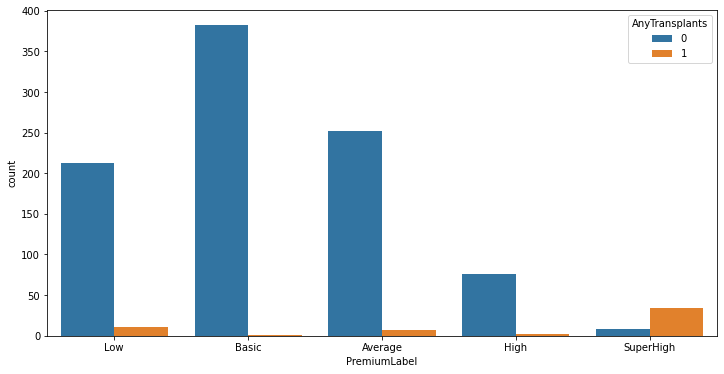

In [23]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='PremiumLabel',hue='AnyTransplants', data=df_ins,ax=ax)

In [24]:
df_ins.groupby(['PremiumLabel','NumberOfMajorSurgeries'])['NumberOfMajorSurgeries'].count()

PremiumLabel  NumberOfMajorSurgeries
Low           0                         142
              1                          82
              2                           0
              3                           0
Basic         0                         226
              1                         156
              2                           1
              3                           0
Average       0                          67
              1                          59
              2                         117
              3                          16
High          0                          22
              1                          56
              2                           0
              3                           0
SuperHigh     0                          22
              1                          19
              2                           1
              3                           0
Name: NumberOfMajorSurgeries, dtype: int64

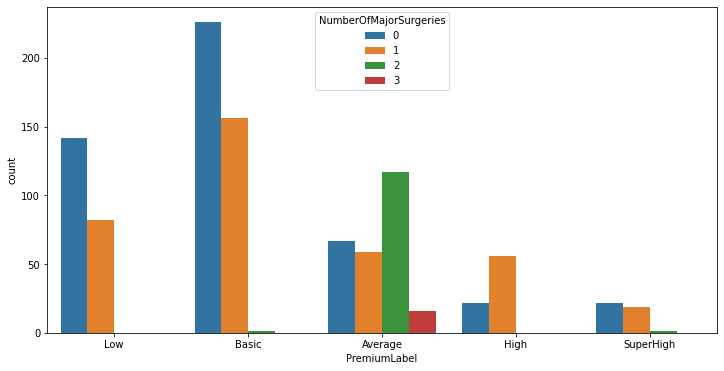

In [25]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='PremiumLabel',hue='NumberOfMajorSurgeries', data=df_ins,ax=ax)

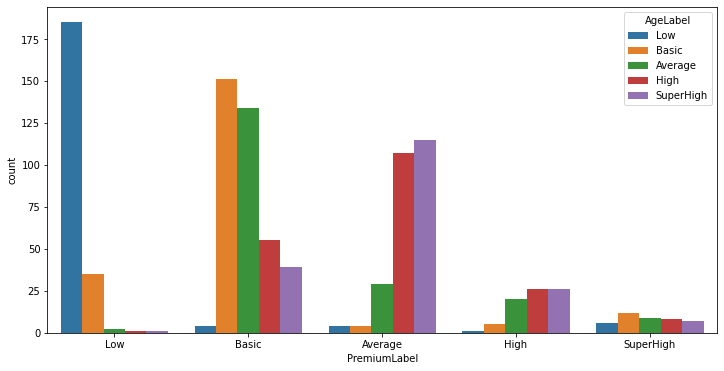

In [26]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='PremiumLabel',hue='AgeLabel',data=df_ins,ax=ax)

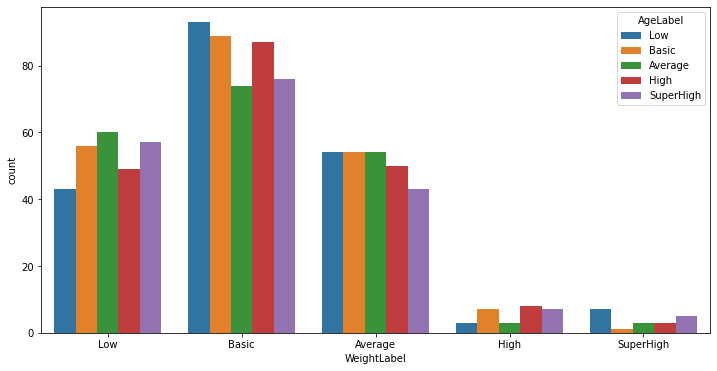

In [27]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='WeightLabel',hue='AgeLabel',data=df_ins,ax=ax)

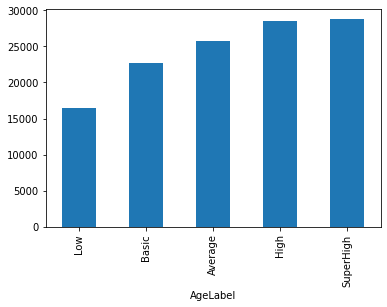

In [28]:
df_ins.groupby(['AgeLabel'])['PremiumPrice'].mean().plot(kind='bar')

In [29]:
df_ins2=pd.get_dummies(data=df_ins,columns=['AgeLabel','PremiumLabel','WeightLabel', 'HeightLabel'])

In [30]:
df_ins2.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'AgeLabel_Low', 'AgeLabel_Basic', 'AgeLabel_Average', 'AgeLabel_High',
       'AgeLabel_SuperHigh', 'PremiumLabel_Low', 'PremiumLabel_Basic',
       'PremiumLabel_Average', 'PremiumLabel_High', 'PremiumLabel_SuperHigh',
       'WeightLabel_Low', 'WeightLabel_Basic', 'WeightLabel_Average',
       'WeightLabel_High', 'WeightLabel_SuperHigh', 'HeightLabel_Low',
       'HeightLabel_Basic', 'HeightLabel_Average', 'HeightLabel_High',
       'HeightLabel_SuperHigh'],
      dtype='object')

In [31]:
df_ins2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
 11  AgeLabel_Low             986 non-null    uint8
 12  AgeLabel_Basic           986 non-null    uint8
 13  AgeLabel_Average         986 non-null    uint8
 14  AgeLabel_High            986 non-null    uint8
 15  AgeLab

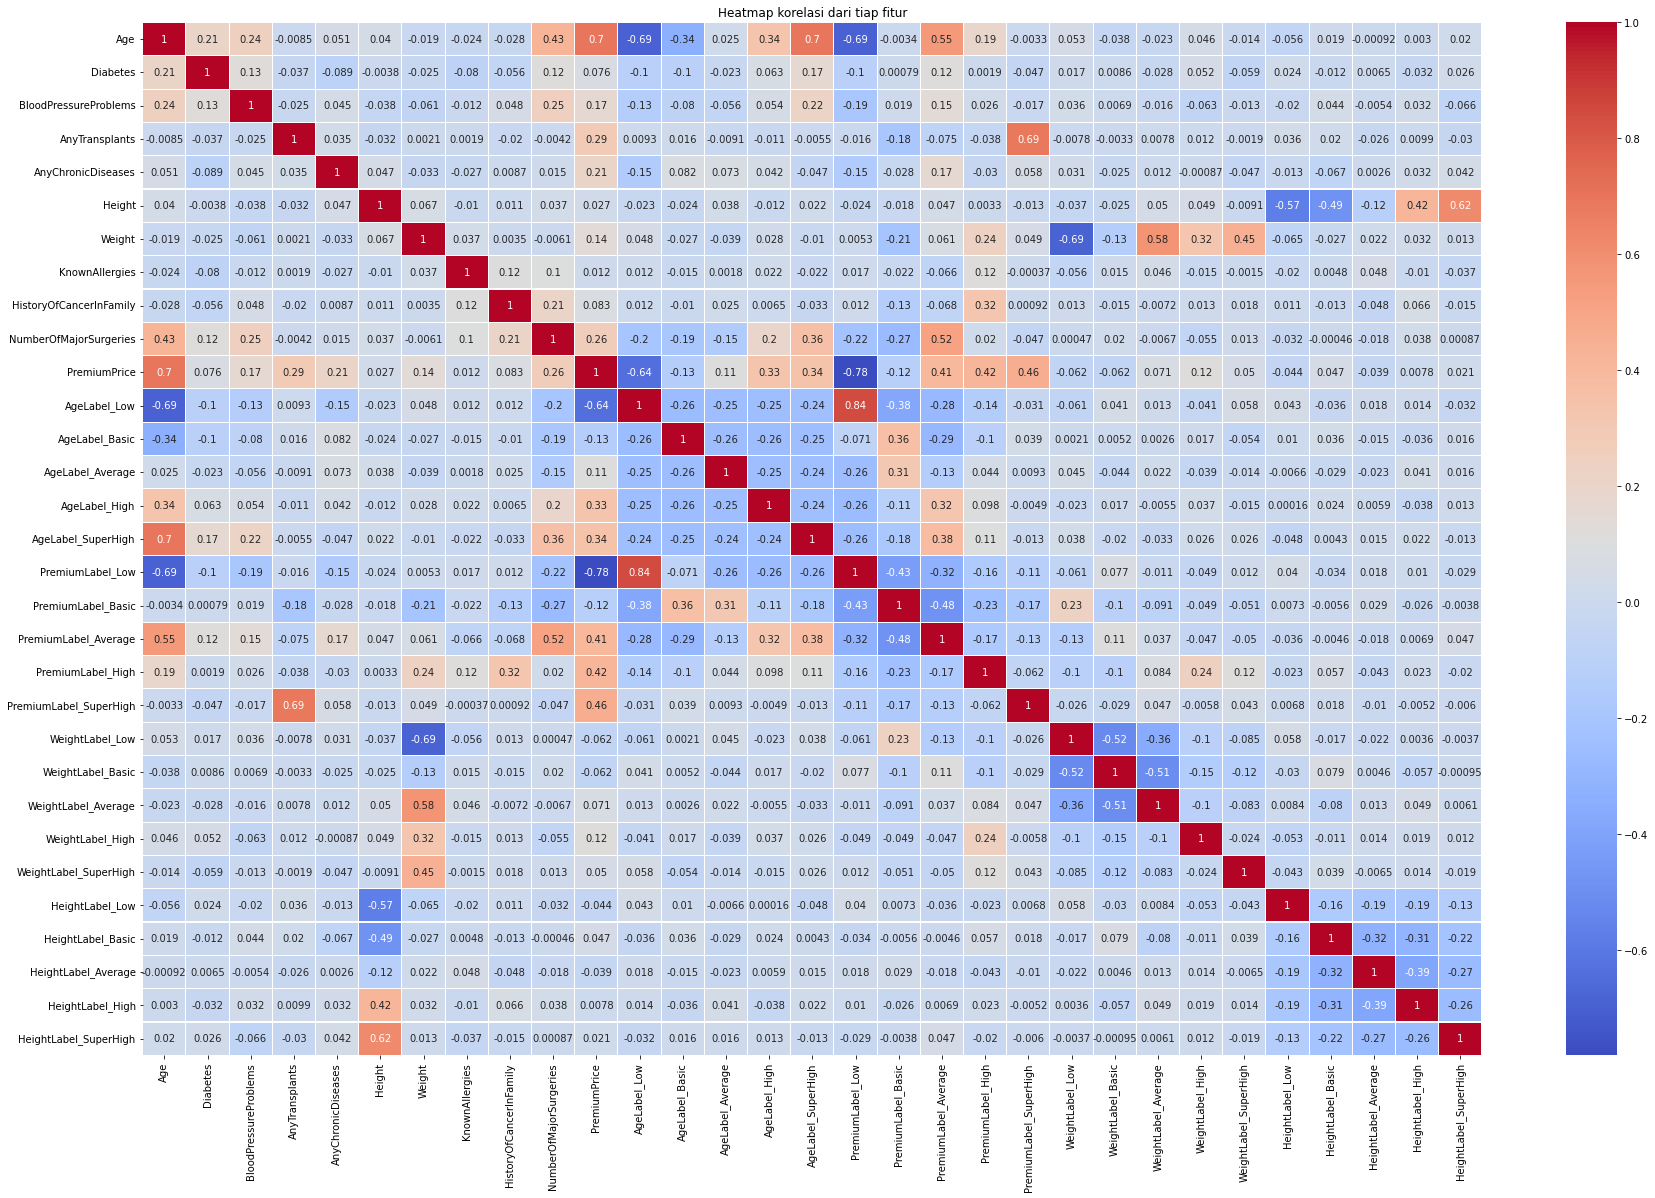

In [32]:
plt.figure(figsize=(30,19))
sns.heatmap(df_ins2.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.title("Heatmap korelasi dari tiap fitur")
plt.show()

In [ ]:
df_seen, df_unseen = data_sampling(df_ins2, 1, random_seed)

In [ ]:
exp2 = setup(df_seen, target = 'PremiumPrice',feature_selection = True,silent= True)

,Description,Value
0,session_id,6878
1,Target,PremiumPrice
2,Original Data,"(986, 31)"
3,Missing Values,False
4,Numeric Features,23
5,Categorical Features,7
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(690, 31)"


In [ ]:
best2 = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1.345652e+02,2.031680e+05,4.051172e+02,9.945000e-01,0.0169,0.0055,0.471
xgboost,Extreme Gradient Boosting,1.734716e+02,2.155284e+05,4.414430e+02,9.938000e-01,0.0184,0.0070,0.452
catboost,CatBoost Regressor,2.515750e+02,2.773223e+05,4.996468e+02,9.928000e-01,0.0190,0.0100,1.385
dt,Decision Tree Regressor,1.043478e+02,2.666667e+05,4.760279e+02,9.926000e-01,0.0206,0.0045,0.021
et,Extra Trees Regressor,1.475217e+02,2.925158e+05,4.928928e+02,9.920000e-01,0.0204,0.0061,0.454
gbr,Gradient Boosting Regressor,3.519508e+02,3.858623e+05,6.062976e+02,9.895000e-01,0.0248,0.0143,0.101
lightgbm,Light Gradient Boosting Machine,3.255620e+02,4.743559e+05,6.479672e+02,9.876000e-01,0.0257,0.0134,0.120
llar,Lasso Least Angle Regression,6.102022e+02,7.809702e+05,8.801752e+02,9.788000e-01,0.0369,0.0254,0.040
lasso,Lasso Regression,6.109090e+02,7.844841e+05,8.817818e+02,9.787000e-01,0.0373,0.0254,0.038
br,Bayesian Ridge,6.130829e+02,7.883562e+05,8.839853e+02,9.786000e-01,0.0374,0.0254,0.018


In [ ]:
# tune model optuna
tune_model(best2, search_library = 'optuna', n_iter=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,53.4359,30197.9970,173.7757,0.9991,0.0108,0.0028
1,129.7484,185009.5345,430.1273,0.9944,0.0231,0.0052
2,151.8531,208050.0231,456.1250,0.9945,0.0208,0.0068
3,193.5244,413475.0168,643.0202,0.9905,0.0251,0.0081
4,216.9320,491197.6640,700.8550,0.9859,0.0257,0.0086
5,73.3223,39777.3615,199.4426,0.9987,0.0076,0.0030
6,137.1444,133793.9654,365.7786,0.9973,0.0131,0.0053
7,131.0468,156545.2211,395.6580,0.9947,0.0197,0.0062
8,120.4661,157330.4407,396.6490,0.9960,0.0117,0.0041


RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=0.8669290887641398,
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.41023439202140916,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      n_estimators=60, n_jobs=-1, oob_score=False,
                      random_state=6878, verbose=0, warm_start=False)

In [ ]:
df_permutated = df_ins2.sample(frac=1)

train_size = 0.8
train_end = int(len(df_permutated)*train_size)

df_train = df_permutated[:train_end]
df_test = df_permutated[train_end:]

In [ ]:
x_train, y_train = df_train.drop('PremiumPrice', axis=1), df_train['PremiumPrice']
x_test, y_test = df_test.drop('PremiumPrice', axis=1), df_test['PremiumPrice']

In [ ]:
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [ ]:
model = build_model_using_sequential()

In [ ]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=30, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/30
10/10 [==============================] - 1s 30ms/step - loss: 37.8393 - mean_squared_logarithmic_error: 37.3881 - val_loss: 7.3324 - val_mean_squared_logarithmic_error: 7.2515
Epoch 2/30
10/10 [==============================] - 0s 11ms/step - loss: 3.5297 - mean_squared_logarithmic_error: 3.4925 - val_loss: 1.0045 - val_mean_squared_logarithmic_error: 0.9745
Epoch 3/30
10/10 [==============================] - 0s 12ms/step - loss: 0.4873 - mean_squared_logarithmic_error: 0.4823 - val_loss: 0.1499 - val_mean_squared_logarithmic_error: 0.1397
Epoch 4/30
10/10 [==============================] - 0s 11ms/step - loss: 0.0903 - mean_squared_logarithmic_error: 0.0898 - val_loss: 0.0586 - val_mean_squared_logarithmic_error: 0.0559
Epoch 5/30
10/10 [==============================] - 0s 9ms/step - loss: 0.0572 - mean_squared_logarithmic_error: 0.0573 - val_loss: 0.0581 - val_mean_squared_logarithmic_error: 0.0577
Epoch 6/30
10/10 [==============================] - 0s 9ms/step - loss: 0.

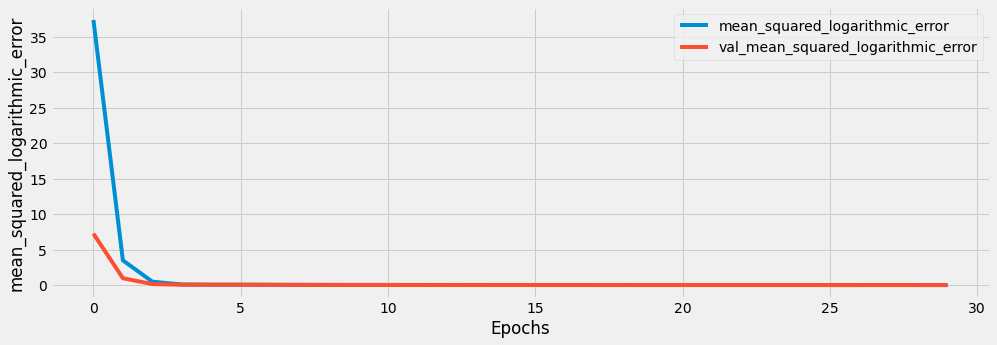

In [ ]:
plot_history(history, 'mean_squared_logarithmic_error')

In [ ]:
# loss function
mse = MeanSquaredError()
model.compile(
    loss=mse, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[mse]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=30, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/30
10/10 [==============================] - 2s 46ms/step - loss: 604129024.0000 - mean_squared_error: 602628288.0000 - val_loss: 551063488.0000 - val_mean_squared_error: 555373824.0000
Epoch 2/30
10/10 [==============================] - 0s 17ms/step - loss: 265405360.0000 - mean_squared_error: 261868496.0000 - val_loss: 67513664.0000 - val_mean_squared_error: 70837168.0000
Epoch 3/30
10/10 [==============================] - 0s 15ms/step - loss: 67605256.0000 - mean_squared_error: 67335544.0000 - val_loss: 64556368.0000 - val_mean_squared_error: 66591980.0000
Epoch 4/30
10/10 [==============================] - 0s 15ms/step - loss: 39708144.0000 - mean_squared_error: 39371576.0000 - val_loss: 17396612.0000 - val_mean_squared_error: 16311717.0000
Epoch 5/30
10/10 [==============================] - 0s 15ms/step - loss: 14054870.0000 - mean_squared_error: 13985355.0000 - val_loss: 12774175.0000 - val_mean_squared_error: 12451704.0000
Epoch 6/30
10/10 [==============================]

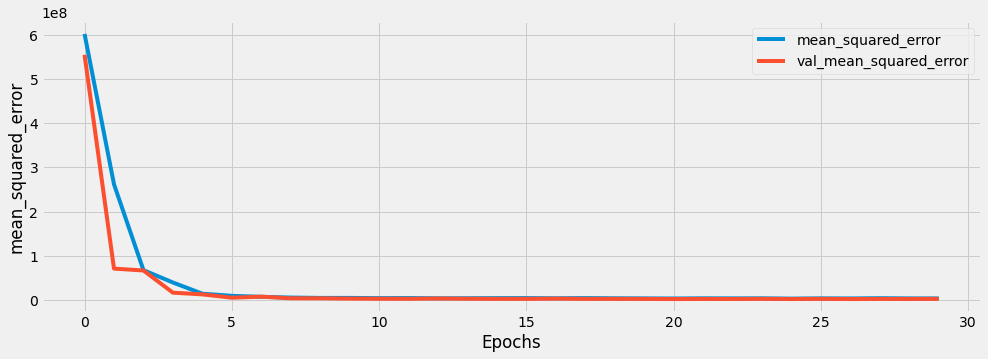

In [ ]:
plot_history(history, 'mean_squared_error')

In [ ]:
# loss function
mae = MeanAbsoluteError()
model.compile(
    loss=mae, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[mae]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=30, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/30
10/10 [==============================] - 2s 47ms/step - loss: 23618.1777 - mean_absolute_error: 23594.6953 - val_loss: 22644.0410 - val_mean_absolute_error: 22816.0566
Epoch 2/30
10/10 [==============================] - 0s 17ms/step - loss: 14877.1123 - mean_absolute_error: 14736.6982 - val_loss: 7340.1597 - val_mean_absolute_error: 6979.8101
Epoch 3/30
10/10 [==============================] - 0s 17ms/step - loss: 6427.7720 - mean_absolute_error: 6420.9692 - val_loss: 6497.7031 - val_mean_absolute_error: 6465.3984
Epoch 4/30
10/10 [==============================] - 0s 16ms/step - loss: 4252.1748 - mean_absolute_error: 4237.5356 - val_loss: 2780.9534 - val_mean_absolute_error: 2710.0620
Epoch 5/30
10/10 [==============================] - 0s 16ms/step - loss: 2850.1755 - mean_absolute_error: 2850.9897 - val_loss: 2687.3635 - val_mean_absolute_error: 2625.7178
Epoch 6/30
10/10 [==============================] - 0s 17ms/step - loss: 2278.7400 - mean_absolute_error: 2279.4771 - v

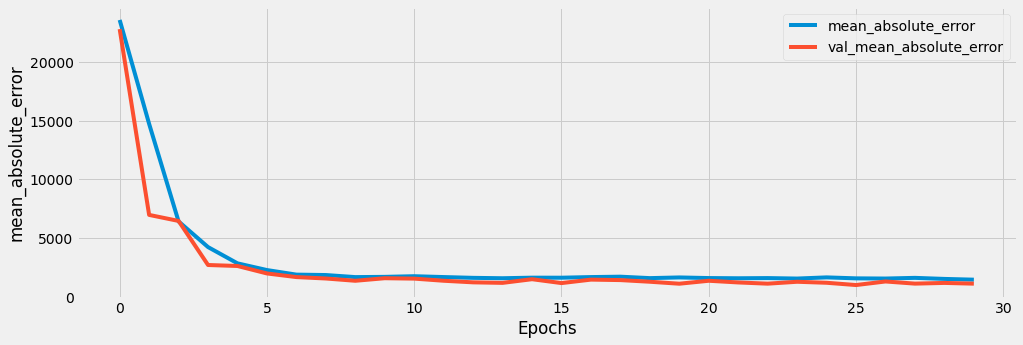

In [ ]:
plot_history(history, 'mean_absolute_error')

In [ ]:
x_test['prediction'] = model.predict(x_test_scaled)

In [ ]:
x_test['prediction']

257    13858.944336
782    14294.401367
654    23672.023438
796    16009.879883
393    27066.972656
           ...     
254    25876.363281
145    27135.222656
67     15355.493164
384    27306.128906
345    29007.246094
Name: prediction, Length: 198, dtype: float32